In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("drive/MyDrive/healthcare-dataset-stroke-data.csv",encoding='utf-8')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


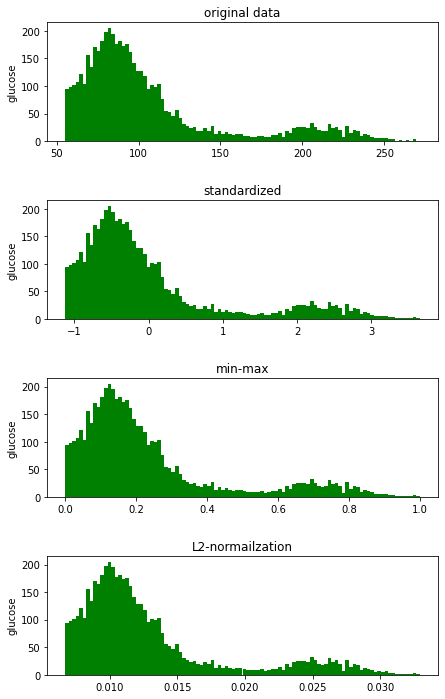

In [ ]:
import sklearn.preprocessing as preproc


data['standardized_n'] = preproc.StandardScaler().fit_transform(data[['avg_glucose_level']])
data['minmax_n'] = preproc.minmax_scale(data[['avg_glucose_level']])
data['l2_normalized_n'] = preproc.normalize(data[['avg_glucose_level']], axis = 0)

fig,(ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (7, 12))
plt.subplots_adjust(wspace =0, hspace =0.5)

ax1.hist(data['avg_glucose_level'], bins = 100, color = 'g')
ax1.set_xlabel('')
ax1.set_ylabel('glucose')
ax1.set_title('original data')

ax2.hist(data['standardized_n'], bins = 100, color = 'g')
ax2.set_xlabel('')
ax2.set_ylabel('glucose')
ax2.set_title('standardized')

ax3.hist(data['minmax_n'], bins = 100, color = 'g')
ax3.set_xlabel('')
ax3.set_ylabel('glucose')
ax3.set_title('min-max')

ax4.hist(data['l2_normalized_n'], bins = 100, color = 'g')
ax4.set_xlabel('')
ax4.set_ylabel('glucose')
ax4.set_title('L2-normailzation')

plt.show()

In [42]:
u = data['avg_glucose_level'].mean()
std = data['avg_glucose_level'].std()
error = data[np.abs(data['avg_glucose_level'] - u) > 3*std]
data_c = data[np.abs(data['avg_glucose_level'] - u) <= 3*std]
print(data_c.head())
print(error.head())

      id  gender   age  ...   bmi  smoking_status  stroke
0   9046       1  67.0  ...  36.6               1       1
1  51676       0  61.0  ...   NaN               2       1
2  31112       1  80.0  ...  32.5               2       1
3  60182       0  49.0  ...  34.4               3       1
4   1665       0  79.0  ...  24.0               2       1

[5 rows x 12 columns]
        id  gender   age  ...   bmi  smoking_status  stroke
33   54401       1  80.0  ...  30.5               1       1
45   19824       1  76.0  ...  33.6               2       1
122  13491       1  80.0  ...  31.7               3       1
123  44033       1  56.0  ...  35.8               2       1
135  71279       0  71.0  ...  38.7               2       1

[5 rows x 12 columns]


In [17]:
from sklearn.preprocessing import LabelEncoder

gle = LabelEncoder()
genre_labels = gle.fit_transform(data['work_type'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
genre_mappings

{0: 'Govt_job',
 1: 'Never_worked',
 2: 'Private',
 3: 'Self-employed',
 4: 'children'}

In [19]:
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['ever_married'] = le.fit_transform(data['ever_married'])
data['work_type'] = le.fit_transform(data['work_type'])
data['Residence_type'] = le.fit_transform(data['Residence_type'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])
x = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values

print('X Shape', x.shape)
print('Y Shape',y.shape)

X Shape (5110, 10)
Y Shape (5110,)


In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,5,9])],remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [25]:
#Filter
from sklearn.feature_selection import VarianceThreshold

VarianceThreshold(threshold=3).fit_transform(x)

array([[ 67.  , 228.69,  36.6 ],
       [ 61.  , 202.21,    nan],
       [ 80.  , 105.92,  32.5 ],
       ...,
       [ 35.  ,  82.99,  30.6 ],
       [ 51.  , 166.29,  25.6 ],
       [ 44.  ,  85.28,  26.2 ]])

In [43]:
#Wrapper
features = ['id','age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'gender',
 'work_type',
 'smoking_status']

label = ['stroke']

X_1 = data[features]
y_1 = data[label]
X_1.bmi=(X_1.bmi.fillna(28.74))
X_1.gender=(X_1.gender.fillna(1))


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [39]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X_1, y_1)

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.33,random_state=42)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

RFE(estimator=LogisticRegression(), n_features_to_select=2).fit_transform(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning

array([[0.        , 1.        ],
       [0.25230092, 0.74769908],
       [0.        , 1.        ],
       ...,
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [41]:
#Embedded
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
 
SelectFromModel(LogisticRegression(C=0.1)).fit_transform(X_train, y_train)

array([[0.        , 2.        , 3.        ],
       [0.        , 2.24309724, 0.        ],
       [0.        , 2.        , 2.        ],
       ...,
       [0.        , 2.63624944, 2.75749963],
       [0.        , 2.        , 3.        ],
       [0.        , 2.        , 0.50776673]])